In [5]:
import zipfile

# Unzip the archive

local_zip = 'datasets/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('datasets')

zip_ref.close()

In [6]:
import os

base_dir = 'datasets/cats_and_dogs_filtered'

print("Contents of the base directory")
print(os.listdir(base_dir))

print("\nContents of train directory")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory")
print(os.listdir(f'{base_dir}/validation'))

Contents of the base directory
['train', 'validation', 'vectorize.py']

Contents of train directory
['cats', 'dogs']

Contents of validation directory
['cats', 'dogs']


In [15]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [16]:
# Inspect file names

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [17]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500


In [20]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Graph parameters
nrows = 4
ncols = 4
pic_index = 0 # to iterate over images

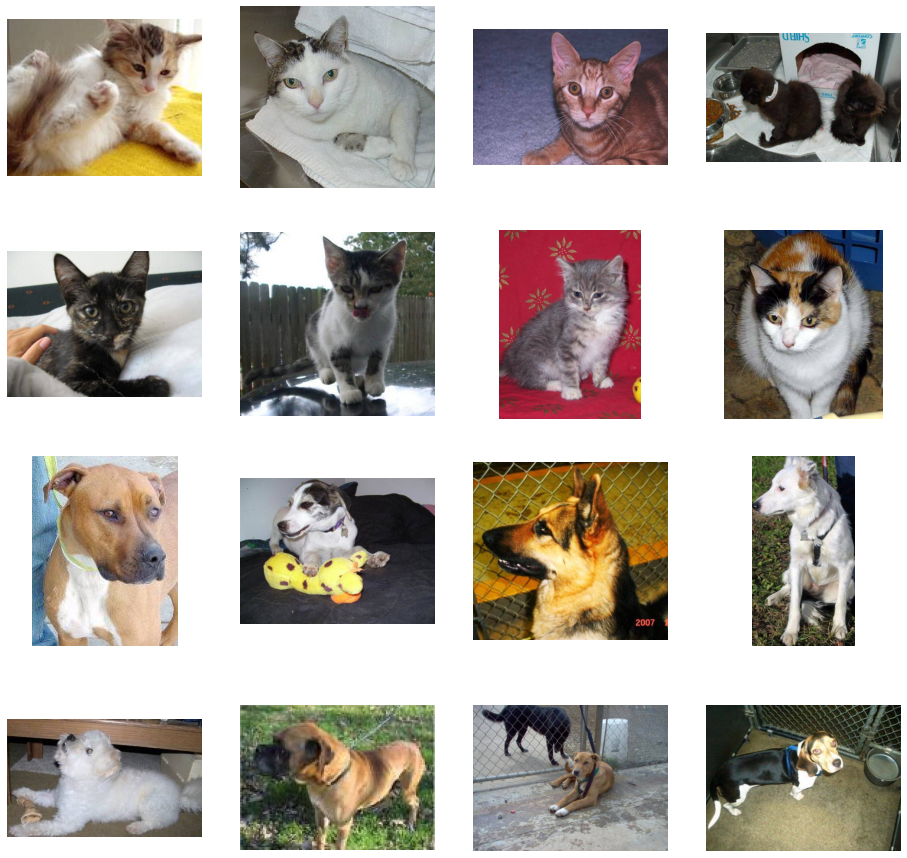

In [22]:
# Display batches of 8cats and 8dogs in 4x4

fig = plt.gcf()

fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # dont show axes or gridlines
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [25]:
# Build DNN model, around 72% accuracy

import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [27]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1/255

train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='binary', target_size=(150,150))

# Flow validation images in batches of 20 using train_datagen generator
validation_generator = train_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode='binary', target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/15
100/100 - 18s - loss: 0.0588 - accuracy: 0.9835 - val_loss: 1.6009 - val_accuracy: 0.7000 - 18s/epoch - 175ms/step
Epoch 2/15
100/100 - 17s - loss: 0.0269 - accuracy: 0.9910 - val_loss: 3.6137 - val_accuracy: 0.6430 - 17s/epoch - 170ms/step
Epoch 3/15
100/100 - 17s - loss: 0.0276 - accuracy: 0.9910 - val_loss: 2.2828 - val_accuracy: 0.6980 - 17s/epoch - 173ms/step
Epoch 4/15
100/100 - 16s - loss: 0.0091 - accuracy: 0.9965 - val_loss: 3.7688 - val_accuracy: 0.6640 - 16s/epoch - 164ms/step
Epoch 5/15
100/100 - 17s - loss: 0.0587 - accuracy: 0.9895 - val_loss: 2.2610 - val_accuracy: 0.7190 - 17s/epoch - 166ms/step
Epoch 6/15
100/100 - 16s - loss: 0.0309 - accuracy: 0.9925 - val_loss: 2.0609 - val_accuracy: 0.7040 - 16s/epoch - 164ms/step
Epoch 7/15
100/100 - 17s - loss: 0.0125 - accuracy: 0.9950 - val_loss: 2.4144 - val_accuracy: 0.7130 - 17s/epoch - 166ms/step
Epoch 8/15
100/100 - 17s - loss: 0.0260 - accuracy: 0.9965 - val_loss: 2.9263 - val_accuracy: 0.7130 - 17s/epoch - 165